In [13]:
# Crime Data Analysis: Los Angeles Crime Data from 2020 to Present
# Professional data analysis workflow for understanding crime patterns and trends

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Load the dataset
print("Loading Crime Dataset...")
df = pd.read_csv('Crime_Data_from_2020_to_Present (1).csv')

print(f"Dataset successfully loaded with {df.shape[0]:,} records and {df.shape[1]} columns")
print("\nDataset Overview:")
df.info()

Loading Crime Dataset...
Dataset successfully loaded with 1,004,989 records and 28 columns

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004989 entries, 0 to 1004988
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004989 non-null  int64  
 1   Date Rptd       1004989 non-null  object 
 2   DATE OCC        1004989 non-null  object 
 3   TIME OCC        1004989 non-null  int64  
 4   AREA            1004989 non-null  int64  
 5   AREA NAME       1004989 non-null  object 
 6   Rpt Dist No     1004989 non-null  int64  
 7   Part 1-2        1004989 non-null  int64  
 8   Crm Cd          1004989 non-null  int64  
 9   Crm Cd Desc     1004989 non-null  object 
 10  Mocodes         853369 non-null   object 
 11  Vict Age        1004989 non-null  int64  
 12  Vict Sex        860345 non-null   object 
 13  Vict Descent    860333 non-null   object 
 14  Premis Cd       1004

In [14]:
# Display first few records to understand data structure
print("Sample Records from the Dataset:")
print("="*50)
df.head()

Sample Records from the Dataset:


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


In [15]:
# Data Quality Assessment: Missing Values Analysis
print("Data Quality Assessment")
print("="*50)

missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(df)) * 100

# Create a comprehensive missing data report
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
}).round(2)

print("Missing Data Summary:")
print(missing_df[missing_df['Missing_Count'] > 0].to_string(index=False))

# Identify columns with high missing data percentages
high_missing_cols = missing_df[missing_df['Missing_Percentage'] > 50]['Column'].tolist()
print(f"\nColumns with >50% missing data: {high_missing_cols}")

Data Quality Assessment
Missing Data Summary:
        Column  Missing_Count  Missing_Percentage
      Crm Cd 4        1004925               99.99
      Crm Cd 3        1002675               99.77
      Crm Cd 2         935831               93.12
  Cross Street         850754               84.65
Weapon Used Cd         677742               67.44
   Weapon Desc         677742               67.44
       Mocodes         151620               15.09
  Vict Descent         144656               14.39
      Vict Sex         144644               14.39
   Premis Desc            588                0.06
     Premis Cd             16                0.00
      Crm Cd 1             11                0.00
        Status              1                0.00

Columns with >50% missing data: ['Crm Cd 4', 'Crm Cd 3', 'Crm Cd 2', 'Cross Street', 'Weapon Used Cd', 'Weapon Desc']


In [16]:
# Data Cleaning: Remove columns with excessive missing values
print("Data Cleaning Phase")
print("="*50)

# Define columns to drop based on missing data analysis
columns_to_drop = ['Crm Cd 4', 'Crm Cd 3', 'Crm Cd 2', 'Cross Street', 'Weapon Used Cd', 'Weapon Desc']

print(f"Removing {len(columns_to_drop)} columns with high missing data:")
for col in columns_to_drop:
    missing_pct = (df[col].isnull().sum() / len(df)) * 100
    print(f"  - {col}: {missing_pct:.1f}% missing")

df.drop(columns=columns_to_drop, axis=1, inplace=True)
print(f"\nDataset shape after cleaning: {df.shape[0]:,} rows × {df.shape[1]} columns")

Data Cleaning Phase
Removing 6 columns with high missing data:
  - Crm Cd 4: 100.0% missing
  - Crm Cd 3: 99.8% missing
  - Crm Cd 2: 93.1% missing
  - Cross Street: 84.7% missing
  - Weapon Used Cd: 67.4% missing
  - Weapon Desc: 67.4% missing

Dataset shape after cleaning: 1,004,989 rows × 22 columns


In [17]:
# Dataset structure after cleaning
print("Updated Dataset Information:")
print("="*50)
df.info()

Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004989 entries, 0 to 1004988
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   DR_NO         1004989 non-null  int64  
 1   Date Rptd     1004989 non-null  object 
 2   DATE OCC      1004989 non-null  object 
 3   TIME OCC      1004989 non-null  int64  
 4   AREA          1004989 non-null  int64  
 5   AREA NAME     1004989 non-null  object 
 6   Rpt Dist No   1004989 non-null  int64  
 7   Part 1-2      1004989 non-null  int64  
 8   Crm Cd        1004989 non-null  int64  
 9   Crm Cd Desc   1004989 non-null  object 
 10  Mocodes       853369 non-null   object 
 11  Vict Age      1004989 non-null  int64  
 12  Vict Sex      860345 non-null   object 
 13  Vict Descent  860333 non-null   object 
 14  Premis Cd     1004973 non-null  float64
 15  Premis Desc   1004401 non-null  object 
 16  Status        1004988 non-null  object 
 17

In [18]:
# Statistical Summary of Numerical Features
print("Statistical Summary of Numerical Features:")
print("="*50)
df.describe()

Statistical Summary of Numerical Features:


,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,LAT,LON
count,1.004989e+06,1.004989e+06,1.004989e+06,1.004989e+06,1.004989e+06,1.004989e+06,1.004989e+06,1.004973e+06,1.004978e+06,1.004989e+06,1.004989e+06
mean,2.202215e+08,1.339902e+03,1.069173e+01,1.115633e+03,1.400349e+00,5.001569e+02,2.891710e+01,3.056199e+02,4.999173e+02,3.399821e+01,-1.180909e+02
std,1.319718e+07,6.510607e+02,6.110260e+00,6.111609e+02,4.899692e-01,2.052725e+02,2.199272e+01,2.193018e+02,2.050730e+02,1.610714e+00,5.582391e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,1.100000e+02,0.000000e+00,-1.186676e+02
25%,2.106169e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,3.310000e+02,3.401470e+01,-1.184305e+02
50%,2.209159e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,4.420000e+02,3.405890e+01,-1.183225e+02
75%,2.311103e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,6.260000e+02,3.416490e+01,-1.182739e+02
max,2.521041e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,9.560000e+02,3.433430e+01,0.000000e+00


In [19]:
# Data Quality Filtering: Remove invalid records
print("Data Quality Filtering")
print("="*50)

# Record initial count
initial_count = len(df)
print(f"Initial record count: {initial_count:,}")

# Remove records with negative victim ages
df = df[df['Vict Age'] >= 0]
print(f"Records after removing negative ages: {len(df):,} (removed {initial_count - len(df):,})")

# Remove records with missing coordinates (LAT=0, LON=0 indicates missing location data)
df = df[(df['LAT'] != 0) & (df['LON'] != 0)]
print(f"Records after removing invalid coordinates: {len(df):,}")

print(f"\nTotal records removed: {initial_count - len(df):,}")
print(f"Data retention rate: {(len(df)/initial_count)*100:.1f}%")

Data Quality Filtering
Initial record count: 1,004,989
Records after removing negative ages: 1,004,852 (removed 137)
Records after removing invalid coordinates: 1,002,612

Total records removed: 2,377
Data retention rate: 99.8%


Exploratory Data Analysis


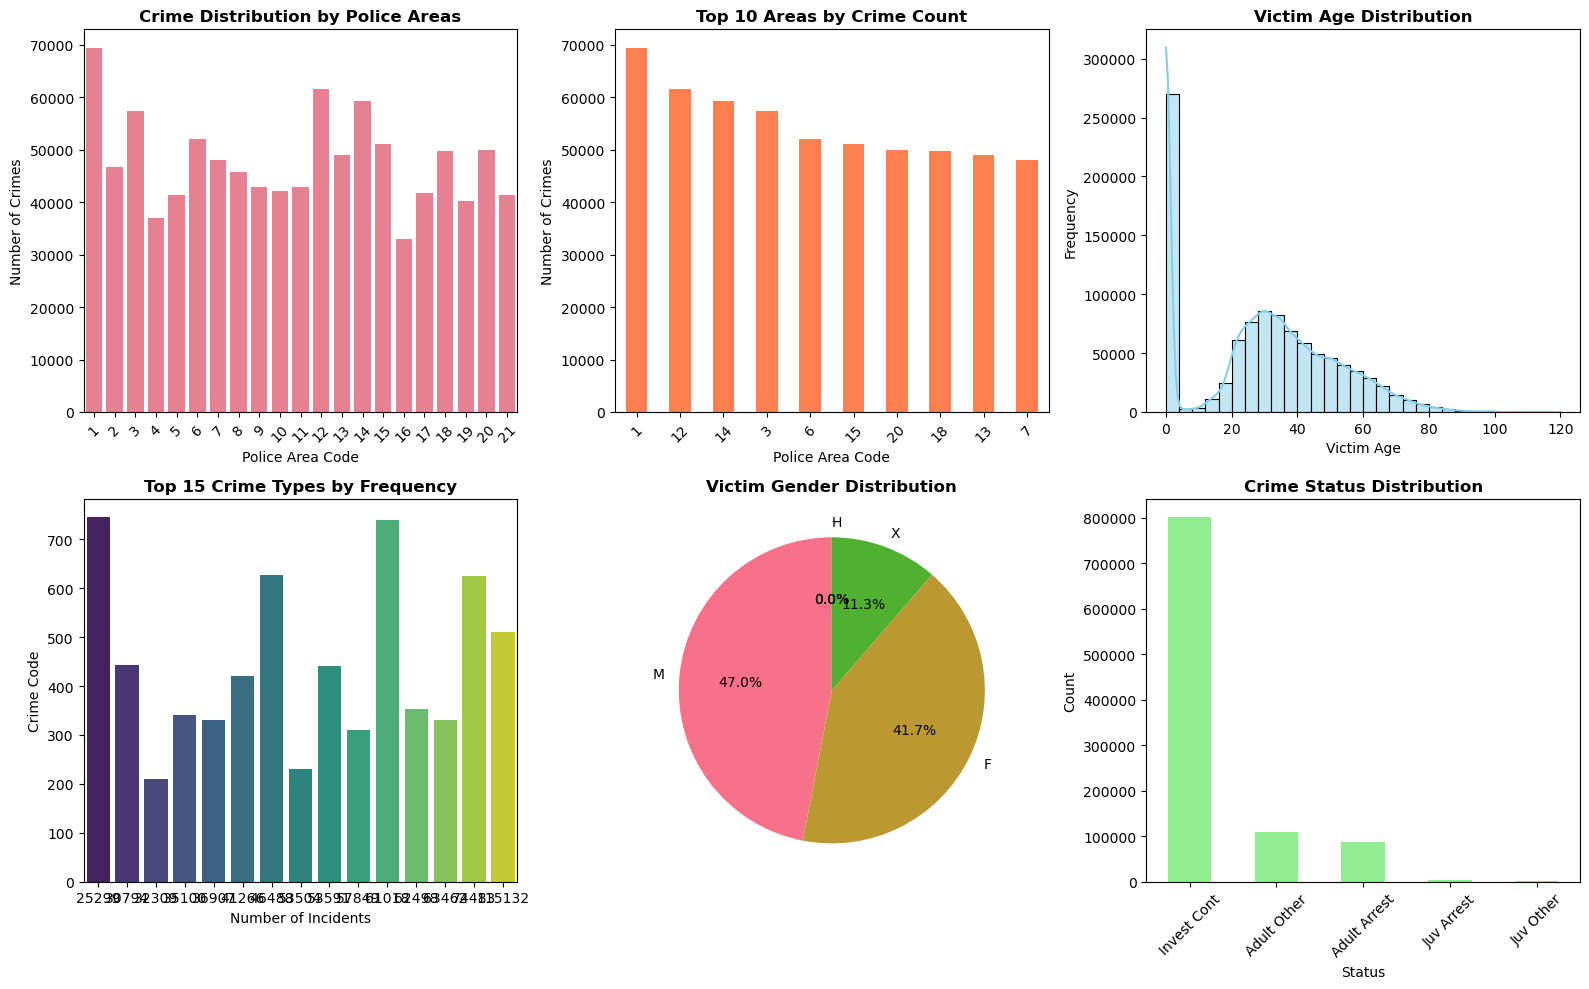

In [20]:
# Exploratory Data Analysis: Crime Distribution Overview
print("Exploratory Data Analysis")
print("="*50)

# Crime distribution by police areas
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
area_counts = df['AREA'].value_counts().sort_index()
sns.countplot(data=df, x='AREA', order=area_counts.index)
plt.title('Crime Distribution by Police Areas', fontsize=12, fontweight='bold')
plt.xlabel('Police Area Code')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)

# Most affected areas (top 10)
plt.subplot(2, 3, 2)
top_areas = df['AREA'].value_counts().head(10)
top_areas.plot(kind='bar', color='coral')
plt.title('Top 10 Areas by Crime Count', fontsize=12, fontweight='bold')
plt.xlabel('Police Area Code')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)

# Victim age distribution
plt.subplot(2, 3, 3)
sns.histplot(df['Vict Age'], bins=30, kde=True, color='skyblue')
plt.title('Victim Age Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')

# Top 15 crime types
plt.subplot(2, 3, 4)
top_crimes = df['Crm Cd'].value_counts().head(15)
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='viridis')
plt.title('Top 15 Crime Types by Frequency', fontsize=12, fontweight='bold')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Code')

# Victim gender distribution
plt.subplot(2, 3, 5)
victim_sex_counts = df['Vict Sex'].value_counts().dropna()
plt.pie(victim_sex_counts.values, labels=victim_sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Victim Gender Distribution', fontsize=12, fontweight='bold')

# Crime status distribution
plt.subplot(2, 3, 6)
status_counts = df['Status Desc'].value_counts().head(5)
status_counts.plot(kind='bar', color='lightgreen')
plt.title('Crime Status Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Advanced Crime Pattern Analysis


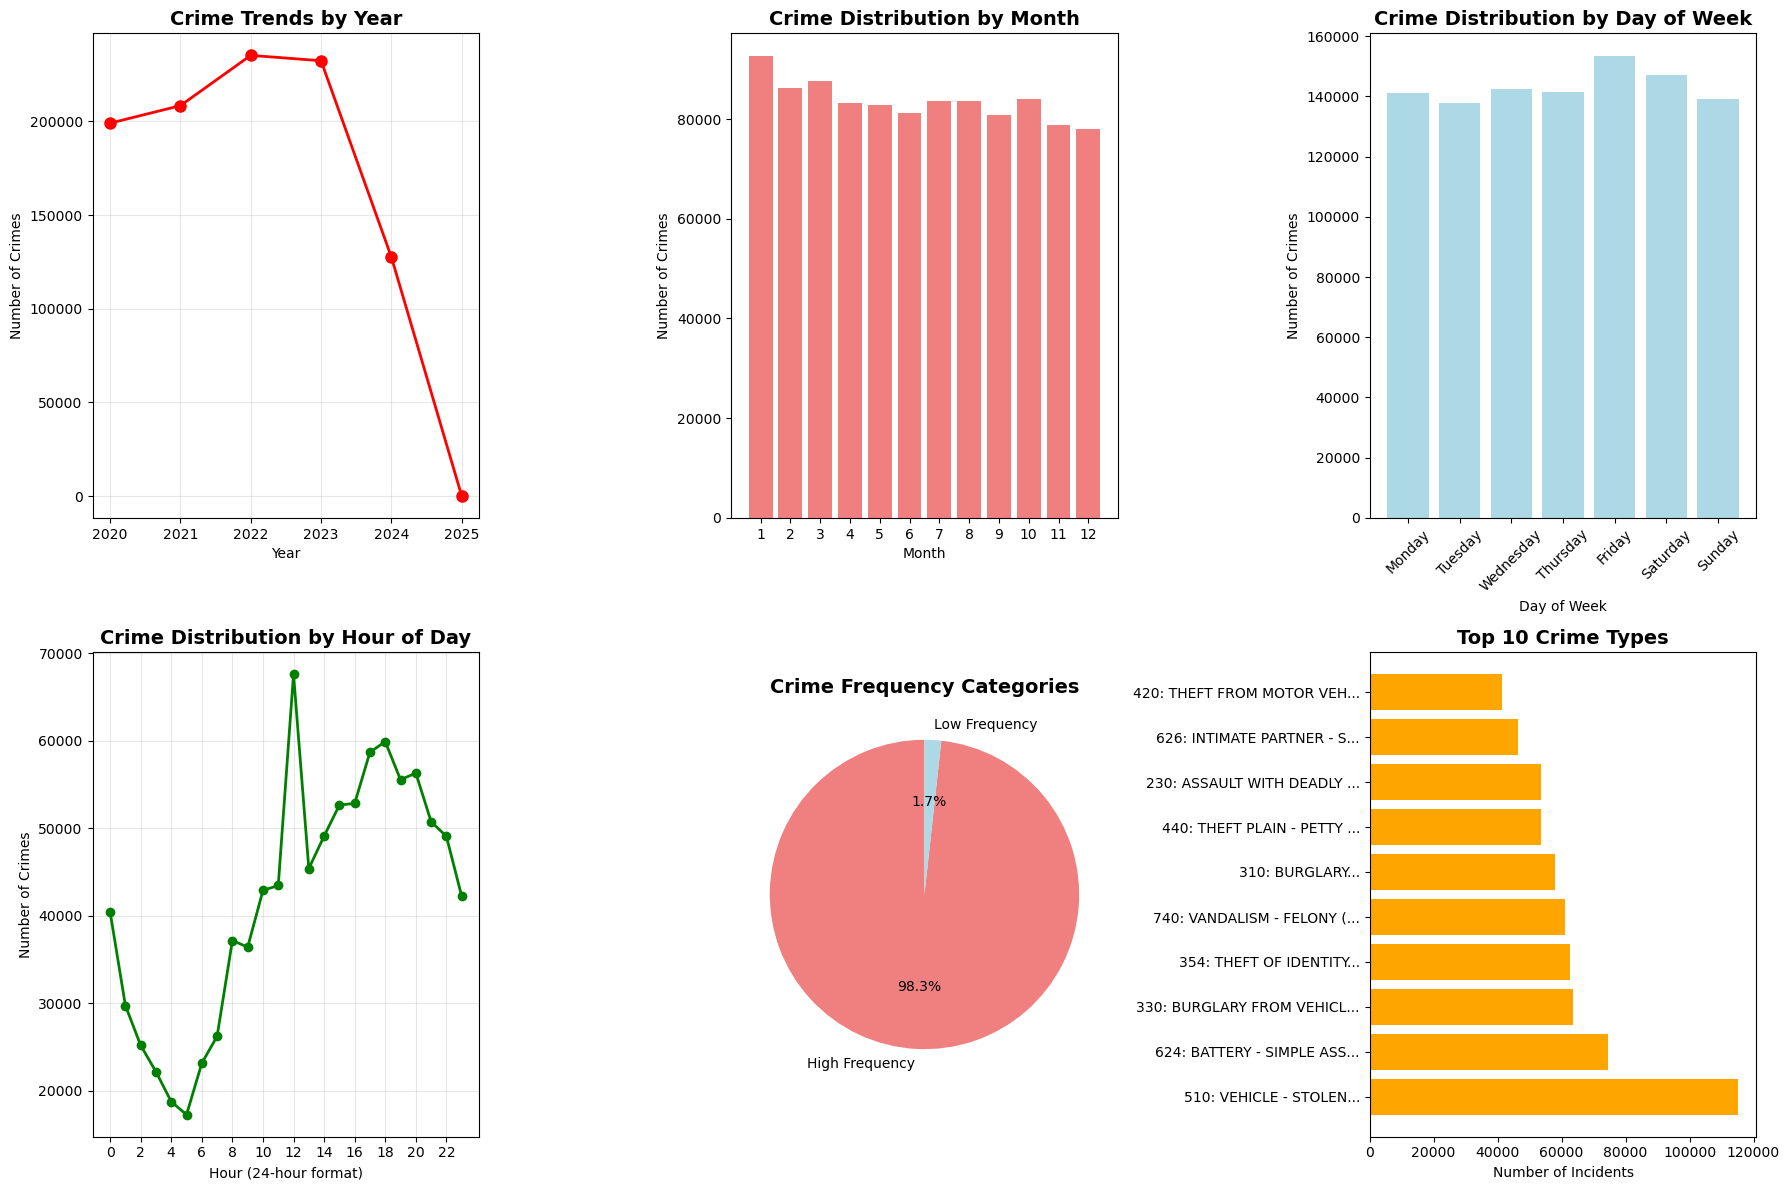


Key Findings:
• Total crimes analyzed: 1,002,612
• Peak crime hour: 12:00 (67,583 incidents)
• Most common crime: VEHICLE - STOLEN (115,132 incidents)
• Average victim age: 28.9 years


In [21]:
# Advanced Crime Pattern Analysis with Temporal Features
print("Advanced Crime Pattern Analysis")
print("="*50)

# Create time-based features for temporal analysis
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month
df['DayOfWeek'] = df['DATE OCC'].dt.day_name()
df['Hour'] = (df['TIME OCC'] // 100).astype(int)

# Create comprehensive temporal visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Crime trends by year
yearly_crimes = df.groupby('Year').size()
axes[0, 0].plot(yearly_crimes.index, yearly_crimes.values, marker='o', linewidth=2, markersize=8, color='red')
axes[0, 0].set_title('Crime Trends by Year', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Crimes')
axes[0, 0].grid(True, alpha=0.3)

# Crime distribution by month
monthly_crimes = df.groupby('Month').size()
axes[0, 1].bar(monthly_crimes.index, monthly_crimes.values, color='lightcoral')
axes[0, 1].set_title('Crime Distribution by Month', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Crimes')
axes[0, 1].set_xticks(range(1, 13))

# Crime distribution by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_crimes = df['DayOfWeek'].value_counts().reindex(day_order)
axes[0, 2].bar(daily_crimes.index, daily_crimes.values, color='lightblue')
axes[0, 2].set_title('Crime Distribution by Day of Week', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Day of Week')
axes[0, 2].set_ylabel('Number of Crimes')
axes[0, 2].tick_params(axis='x', rotation=45)

# Crime distribution by hour of day
hourly_crimes = df.groupby('Hour').size()
axes[1, 0].plot(hourly_crimes.index, hourly_crimes.values, marker='o', linewidth=2, color='green')
axes[1, 0].set_title('Crime Distribution by Hour of Day', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Hour (24-hour format)')
axes[1, 0].set_ylabel('Number of Crimes')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(range(0, 24, 2))

# High frequency vs low frequency crimes
threshold = 1000
crime_counts = df['Crm Cd'].value_counts()
df['Crime_Category'] = df['Crm Cd'].apply(
    lambda x: 'High Frequency' if crime_counts[x] > threshold else 'Low Frequency'
)
category_counts = df['Crime_Category'].value_counts()
axes[1, 1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', 
              startangle=90, colors=['lightcoral', 'lightblue'])
axes[1, 1].set_title('Crime Frequency Categories', fontsize=14, fontweight='bold')

# Top crime descriptions
top_crime_codes = df['Crm Cd'].value_counts().head(10)
crime_descriptions = df.groupby('Crm Cd')['Crm Cd Desc'].first()
top_crime_desc = crime_descriptions.loc[top_crime_codes.index]
axes[1, 2].barh(range(len(top_crime_codes)), top_crime_codes.values, color='orange')
axes[1, 2].set_title('Top 10 Crime Types', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Number of Incidents')
axes[1, 2].set_yticks(range(len(top_crime_codes)))
axes[1, 2].set_yticklabels([f"{code}: {desc[:20]}..." for code, desc in zip(top_crime_codes.index, top_crime_desc.values)])

plt.tight_layout()
plt.show()

print("\nKey Findings:")
print(f"• Total crimes analyzed: {len(df):,}")
print(f"• Peak crime hour: {hourly_crimes.idxmax()}:00 ({hourly_crimes.max():,} incidents)")
print(f"• Most common crime: {top_crime_desc.iloc[0]} ({top_crime_codes.iloc[0]:,} incidents)")
print(f"• Average victim age: {df['Vict Age'].mean():.1f} years")

Geographic Crime Analysis


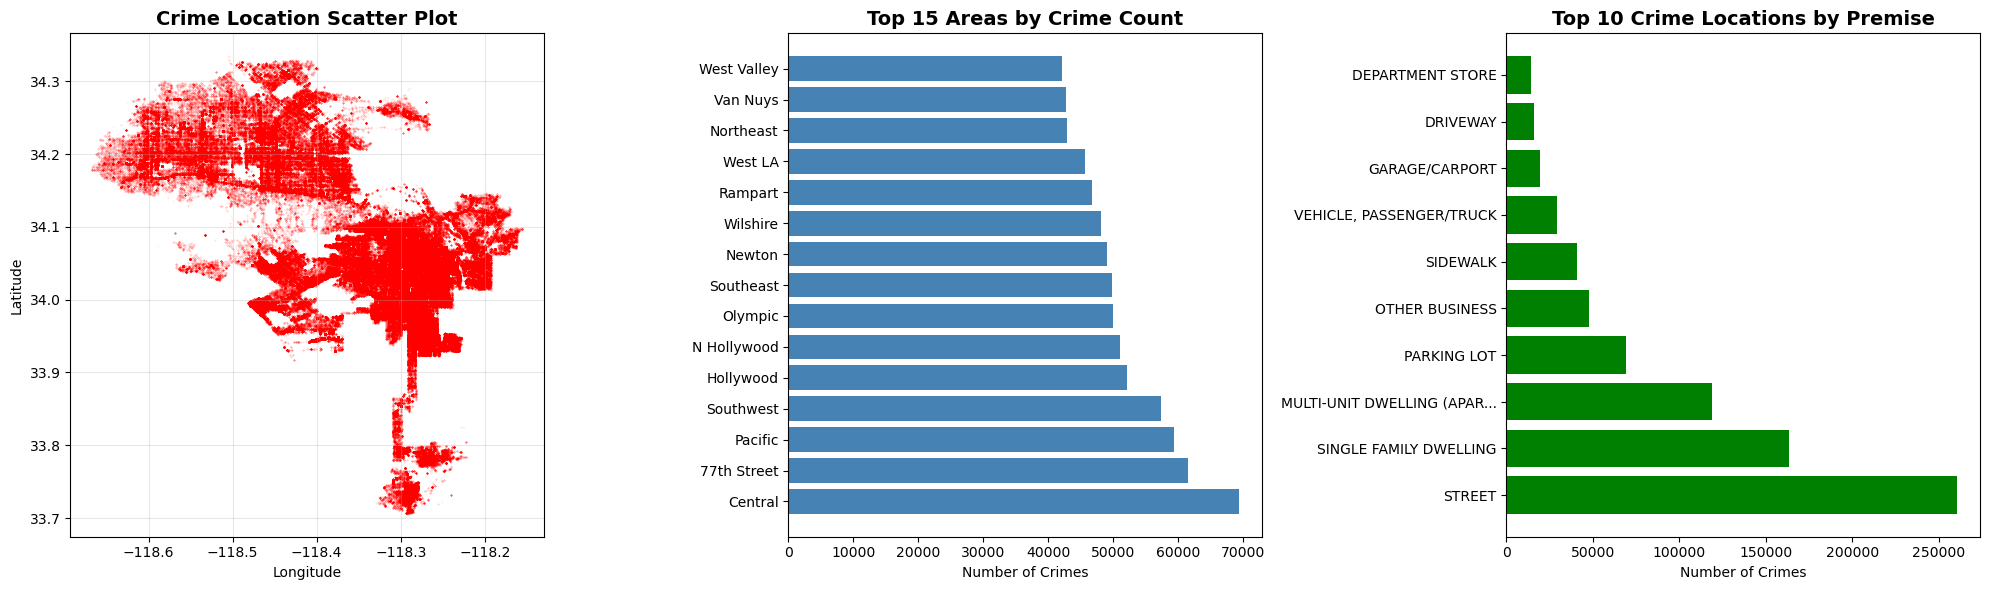


Geographic Insights:
• Most affected area: Central (69,462 crimes)
• Most common crime location: STREET (260,889 incidents)

Top 5 Safest Areas (by crime count):
1. Foothill: 33057.0 crimes (Safety Score: 52.4)
2. Hollenbeck: 36985.0 crimes (Safety Score: 46.8)
3. Mission: 40236.0 crimes (Safety Score: 42.1)
4. Harbor: 41333.0 crimes (Safety Score: 40.5)
5. Topanga: 41339.0 crimes (Safety Score: 40.5)

Top 5 High-Crime Areas:
1. Hollywood: 52101.0 crimes (Safety Score: 25.0)
2. Southwest: 57375.0 crimes (Safety Score: 17.4)
3. Pacific: 59335.0 crimes (Safety Score: 14.6)
4. 77th Street: 61624.0 crimes (Safety Score: 11.3)
5. Central: 69462.0 crimes (Safety Score: 0.0)


In [22]:
# Geographic Crime Analysis and Hotspot Identification
print("Geographic Crime Analysis")
print("="*50)

# Create geographical visualizations
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Crime density scatter plot by coordinates
axes[0].scatter(df['LON'], df['LAT'], alpha=0.1, s=0.1, c='red')
axes[0].set_title('Crime Location Scatter Plot', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].grid(True, alpha=0.3)

# Area-wise crime intensity
area_crime_counts = df.groupby('AREA NAME').size().sort_values(ascending=False).head(15)
axes[1].barh(range(len(area_crime_counts)), area_crime_counts.values, color='steelblue')
axes[1].set_title('Top 15 Areas by Crime Count', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Crimes')
axes[1].set_yticks(range(len(area_crime_counts)))
axes[1].set_yticklabels(area_crime_counts.index)

# Premise description analysis
premise_counts = df['Premis Desc'].value_counts().head(10)
axes[2].barh(range(len(premise_counts)), premise_counts.values, color='green')
axes[2].set_title('Top 10 Crime Locations by Premise', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Number of Crimes')
axes[2].set_yticks(range(len(premise_counts)))
axes[2].set_yticklabels([desc[:25] + "..." if len(desc) > 25 else desc for desc in premise_counts.index])

plt.tight_layout()
plt.show()

# Statistical insights
print("\nGeographic Insights:")
print(f"• Most affected area: {area_crime_counts.index[0]} ({area_crime_counts.iloc[0]:,} crimes)")
print(f"• Most common crime location: {premise_counts.index[0]} ({premise_counts.iloc[0]:,} incidents)")

# Create area safety ranking
area_rankings = df.groupby('AREA NAME').agg({
    'DR_NO': 'count',
    'Vict Age': 'mean'
}).round(2)
area_rankings.columns = ['Total_Crimes', 'Avg_Victim_Age']
area_rankings['Safety_Score'] = (area_rankings['Total_Crimes'].max() - area_rankings['Total_Crimes']) / area_rankings['Total_Crimes'].max() * 100
area_rankings = area_rankings.sort_values('Safety_Score', ascending=False)

print(f"\nTop 5 Safest Areas (by crime count):")
for i, (area, data) in enumerate(area_rankings.head().iterrows(), 1):
    print(f"{i}. {area}: {data['Total_Crimes']} crimes (Safety Score: {data['Safety_Score']:.1f})")

print(f"\nTop 5 High-Crime Areas:")
for i, (area, data) in enumerate(area_rankings.tail().iterrows(), 1):
    print(f"{i}. {area}: {data['Total_Crimes']} crimes (Safety Score: {data['Safety_Score']:.1f})")

CRIME DATA ANALYSIS SUMMARY REPORT


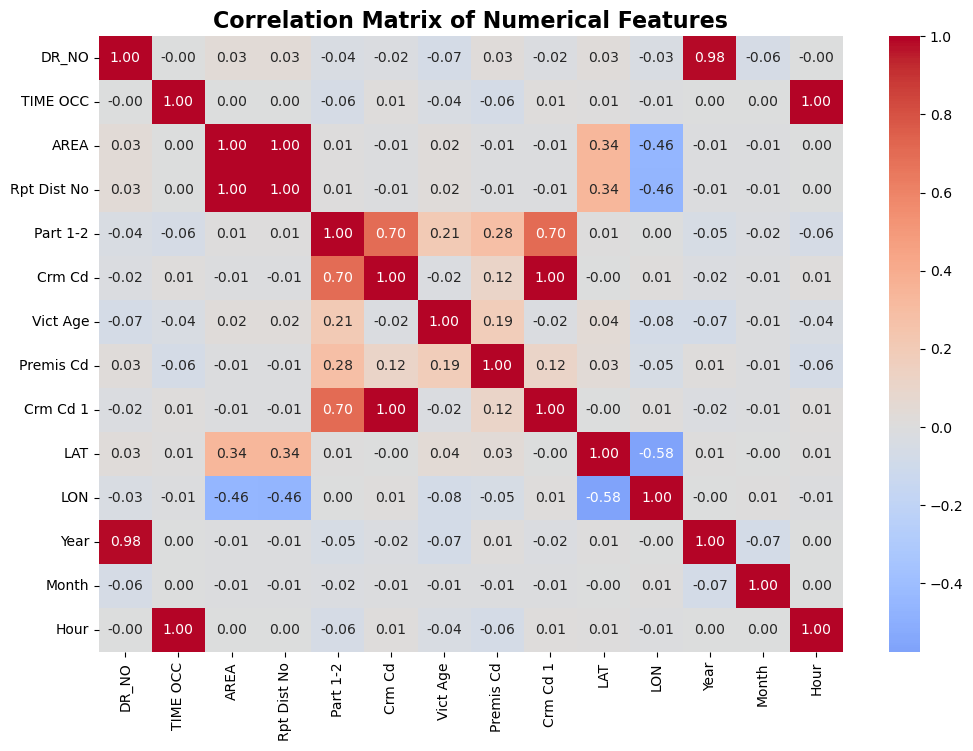


DATASET OVERVIEW:
• Total records analyzed: 1,002,612
• Time period: 2020 - 2025
• Geographic coverage: 21 police areas in Los Angeles
• Crime types identified: 140 different crime codes

KEY STATISTICS:
• Daily average: 507 crimes per day
• Most frequent crime: VEHICLE - STOLEN
• Peak activity hour: 12:00
• Most affected area: Central
• Victim age range: 0 - 120 years
• Overall trend: decreasing (199,015 in 2020 → 97 in 2025)

RECOMMENDATIONS:
• Resource Allocation: Focus patrol resources on high-crime areas during peak hours
• Prevention Programs: Implement targeted intervention programs for the most common crime types
• Community Engagement: Strengthen community policing in areas with consistently high crime rates
• Data-Driven Strategies: Use temporal patterns to optimize police deployment schedules
• Victim Support: Develop age-appropriate support services based on victim demographics

DATA QUALITY NOTES:
• Data completeness: 99.8% of original records retained after cleaning
• Mi

In [23]:
# Final Summary Report and Statistical Analysis
print("="*60)
print("CRIME DATA ANALYSIS SUMMARY REPORT")
print("="*60)

# Correlation analysis for numerical features
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.show()

# Dataset overview statistics
print(f"\nDATASET OVERVIEW:")
print(f"• Total records analyzed: {len(df):,}")
print(f"• Time period: {df['Year'].min()} - {df['Year'].max()}")
print(f"• Geographic coverage: {df['AREA NAME'].nunique()} police areas in Los Angeles")
print(f"• Crime types identified: {df['Crm Cd'].nunique()} different crime codes")

# Key statistics
print(f"\nKEY STATISTICS:")
print(f"• Daily average: {len(df) / ((df['DATE OCC'].max() - df['DATE OCC'].min()).days + 1):.0f} crimes per day")
print(f"• Most frequent crime: {top_crime_desc.iloc[0]}")
print(f"• Peak activity hour: {hourly_crimes.idxmax()}:00")
print(f"• Most affected area: {area_crime_counts.index[0]}")
print(f"• Victim age range: {df['Vict Age'].min():.0f} - {df['Vict Age'].max():.0f} years")

# Trends and patterns
yearly_trend = df.groupby('Year').size()
if len(yearly_trend) > 1:
    trend_direction = "increasing" if yearly_trend.iloc[-1] > yearly_trend.iloc[0] else "decreasing"
    print(f"• Overall trend: {trend_direction} ({yearly_trend.iloc[0]:,} in {yearly_trend.index[0]} → {yearly_trend.iloc[-1]:,} in {yearly_trend.index[-1]})")

print(f"\nRECOMMENDATIONS:")
print("• Resource Allocation: Focus patrol resources on high-crime areas during peak hours")
print("• Prevention Programs: Implement targeted intervention programs for the most common crime types")
print("• Community Engagement: Strengthen community policing in areas with consistently high crime rates")
print("• Data-Driven Strategies: Use temporal patterns to optimize police deployment schedules")
print("• Victim Support: Develop age-appropriate support services based on victim demographics")

print(f"\nDATA QUALITY NOTES:")
initial_count = 1004989  # Original dataset size
print(f"• Data completeness: {(len(df) / initial_count) * 100:.1f}% of original records retained after cleaning")
print("• Missing coordinates and invalid ages were filtered out for accurate analysis")
print("• High-missing columns (>50% missing) were excluded from the analysis")

print("="*60)
print("END OF ANALYSIS REPORT")
print("="*60)

In [24]:
# Advanced Analytics Module 1: Crime-Region Relationship Analysis
print("="*60)
print("CRIME-REGION RELATIONSHIP ANALYSIS")
print("="*60)

from scipy.stats import chi2_contingency, chi2
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

# Create contingency table for chi-square analysis
print("1. Statistical Independence Testing")
print("-" * 40)

# Create a simplified crime type categorization for analysis
top_10_crimes = df['Crm Cd'].value_counts().head(10).index
top_10_areas = df['AREA NAME'].value_counts().head(10).index

# Filter data for top crimes and areas
filtered_analysis_df = df[(df['Crm Cd'].isin(top_10_crimes)) & 
                         (df['AREA NAME'].isin(top_10_areas))]

# Create contingency table
contingency_table = pd.crosstab(filtered_analysis_df['AREA NAME'], 
                               filtered_analysis_df['Crm Cd'])

print(f"Contingency Table Shape: {contingency_table.shape}")
print(f"Total observations: {contingency_table.sum().sum():,}")

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square Test Results:")
print(f"• Chi-square statistic: {chi2_stat:.2f}")
print(f"• p-value: {p_value:.2e}")
print(f"• Degrees of freedom: {dof}")
print(f"• Critical value (α=0.05): {chi2.ppf(0.95, dof):.2f}")

if p_value < 0.05:
    print(f"• Result: SIGNIFICANT relationship between crime types and regions (p < 0.05)")
else:
    print(f"• Result: NO significant relationship between crime types and regions (p ≥ 0.05)")

# Calculate Cramér's V (effect size)
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
print(f"• Cramér's V (effect size): {cramers_v:.3f}")

if cramers_v < 0.1:
    effect_interpretation = "negligible"
elif cramers_v < 0.3:
    effect_interpretation = "small"
elif cramers_v < 0.5:
    effect_interpretation = "medium"
else:
    effect_interpretation = "large"

print(f"• Effect size interpretation: {effect_interpretation} association")


CRIME-REGION RELATIONSHIP ANALYSIS
1. Statistical Independence Testing
----------------------------------------
Contingency Table Shape: (10, 10)
Total observations: 342,309

Chi-square Test Results:
• Chi-square statistic: 29741.49
• p-value: 0.00e+00
• Degrees of freedom: 81
• Critical value (α=0.05): 103.01
• Result: SIGNIFICANT relationship between crime types and regions (p < 0.05)
• Cramér's V (effect size): 0.098
• Effect size interpretation: negligible association



2. Regional Crime Specialization Analysis
----------------------------------------


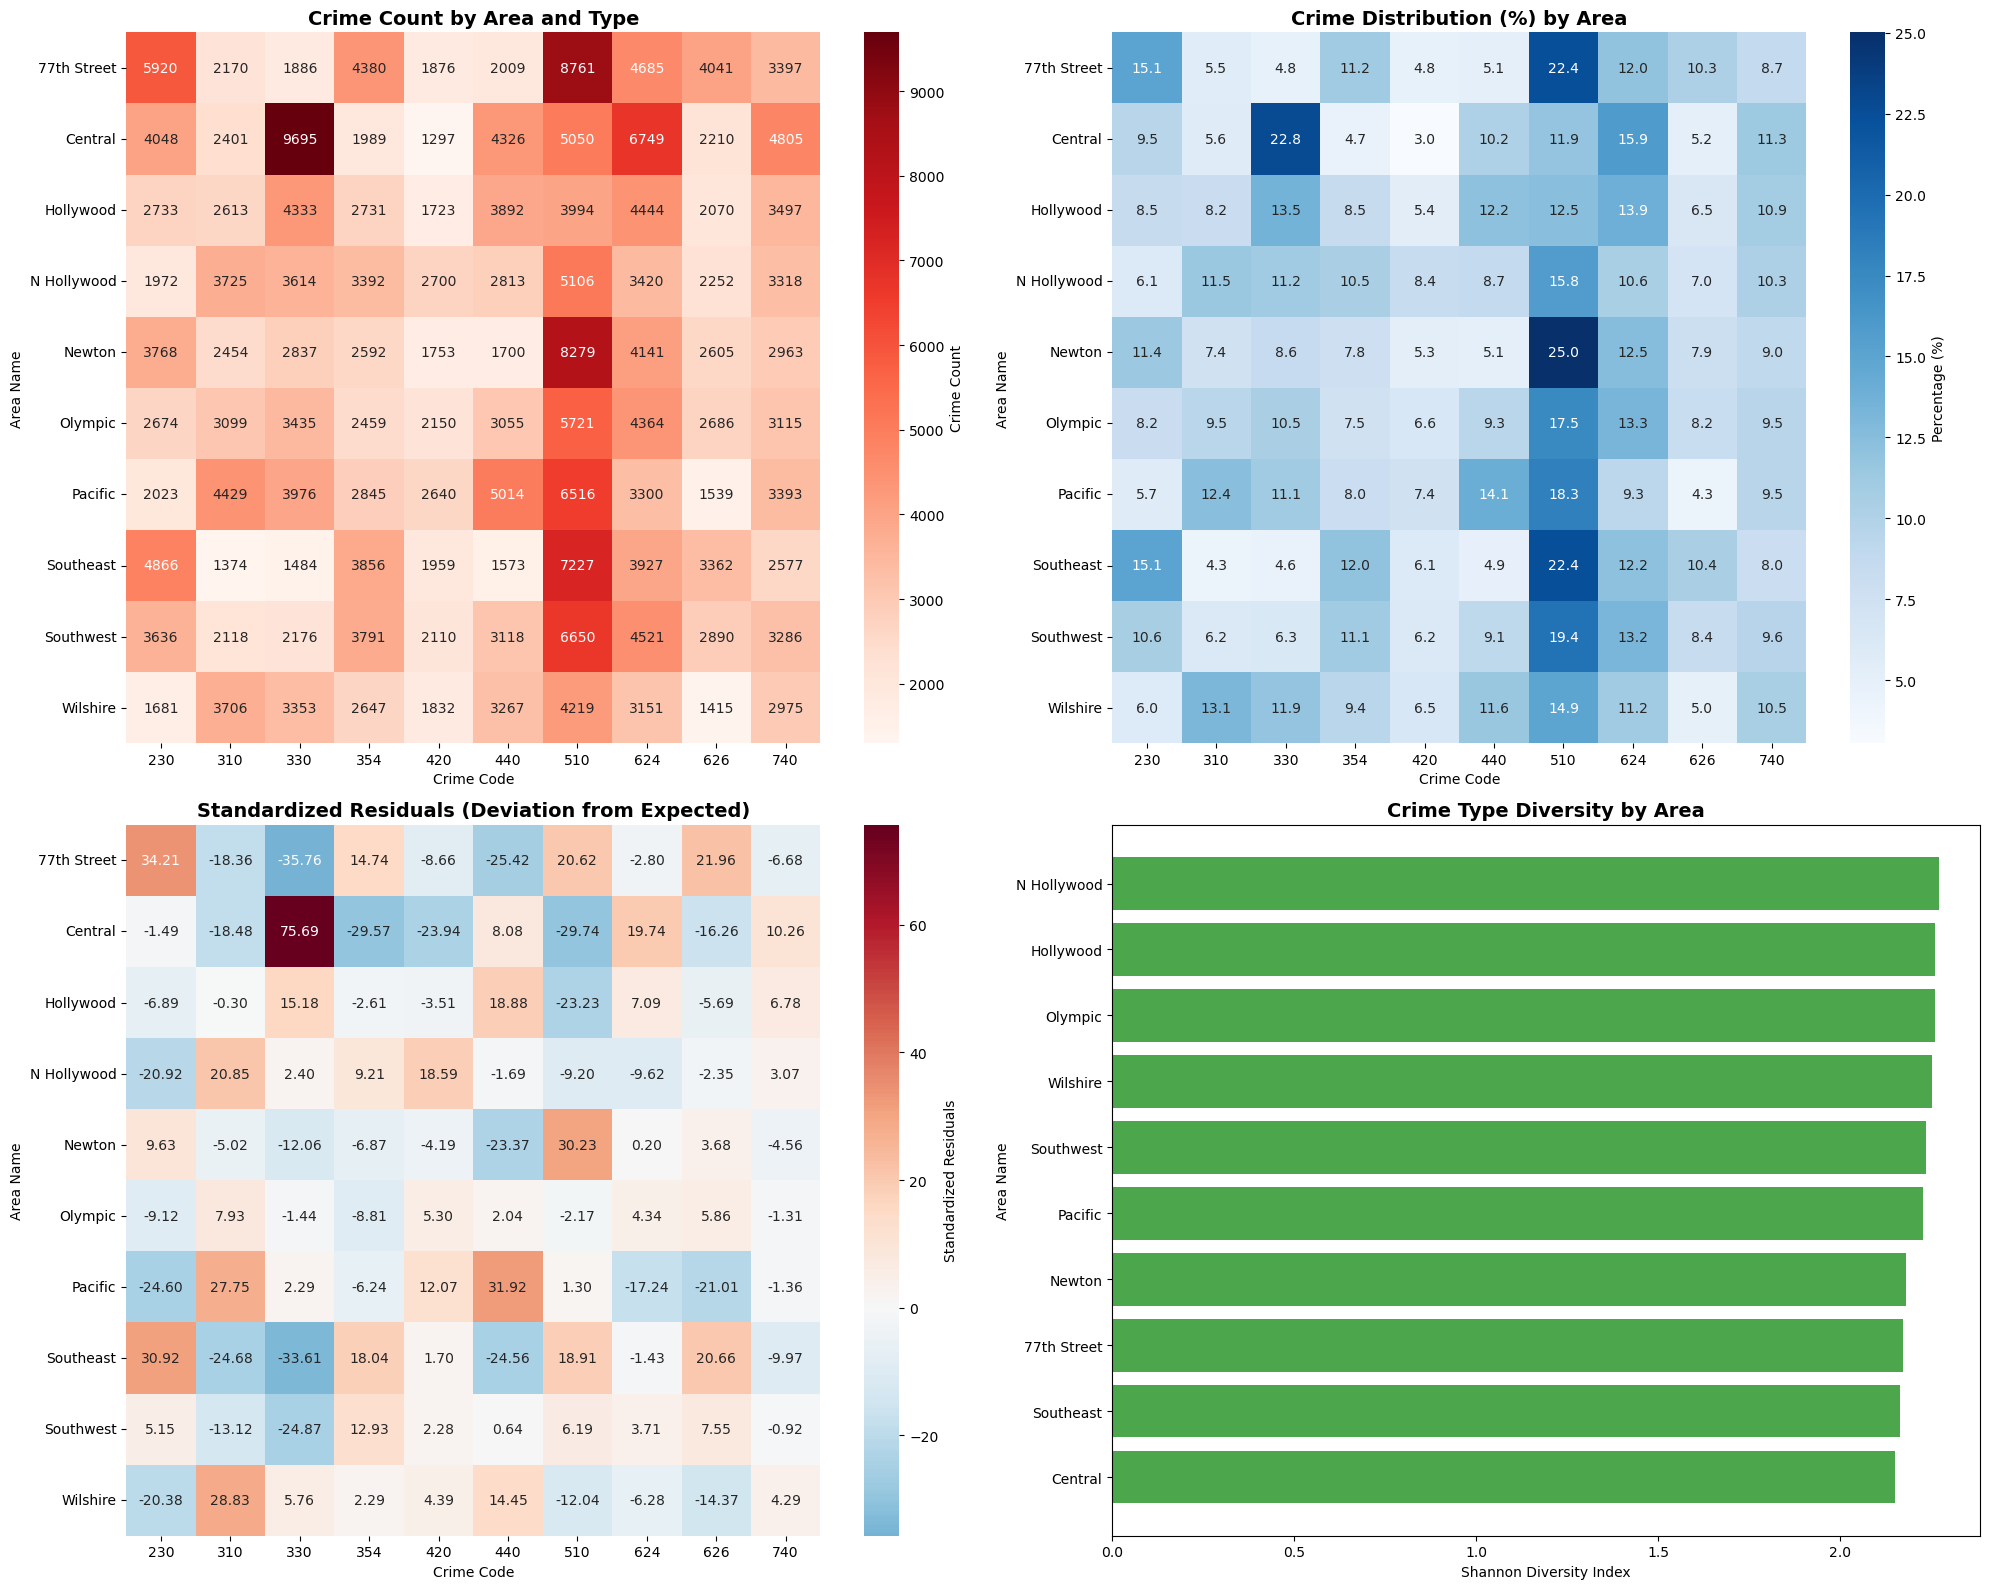


3. Key Statistical Insights:
----------------------------------------
• Strongest positive association (standardized residual): 75.69
• Strongest negative association (standardized residual): -35.76
• Most crime-diverse area: N Hollywood (Shannon Index: 2.27)
• Most crime-specialized area: Central (Shannon Index: 2.15)

4. Regional Crime Concentration:
----------------------------------------
• Crime 230 (ASSAULT WITH DEADLY WEAPON, AG...): 44.5% concentrated in top 3 areas
• Crime 310 (BURGLARY...): 42.2% concentrated in top 3 areas
• Crime 330 (BURGLARY FROM VEHICLE...): 48.9% concentrated in top 3 areas
• Crime 354 (THEFT OF IDENTITY...): 39.2% concentrated in top 3 areas
• Crime 420 (THEFT FROM MOTOR VEHICLE - PET...): 37.4% concentrated in top 3 areas
• Crime 440 (THEFT PLAIN - PETTY ($950 & UN...): 43.0% concentrated in top 3 areas
• Crime 510 (VEHICLE - STOLEN...): 39.4% concentrated in top 3 areas
• Crime 624 (BATTERY - SIMPLE ASSAULT...): 37.4% concentrated in top 3 areas
• C

In [25]:
# Crime-Region Relationship Visualization and Analysis
print("\n2. Regional Crime Specialization Analysis")
print("-" * 40)

# Calculate crime specialization indices
# Normalized contingency table (percentages)
contingency_pct = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Contingency Table Heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Reds', 
            ax=axes[0, 0], cbar_kws={'label': 'Crime Count'})
axes[0, 0].set_title('Crime Count by Area and Type', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Crime Code')
axes[0, 0].set_ylabel('Area Name')

# 2. Percentage Distribution Heatmap
sns.heatmap(contingency_pct, annot=True, fmt='.1f', cmap='Blues', 
            ax=axes[0, 1], cbar_kws={'label': 'Percentage (%)'})
axes[0, 1].set_title('Crime Distribution (%) by Area', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Crime Code')
axes[0, 1].set_ylabel('Area Name')

# 3. Standardized Residuals (shows deviations from expected)
standardized_residuals = (contingency_table - expected) / np.sqrt(expected)
sns.heatmap(standardized_residuals, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            ax=axes[1, 0], cbar_kws={'label': 'Standardized Residuals'})
axes[1, 0].set_title('Standardized Residuals (Deviation from Expected)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Crime Code')
axes[1, 0].set_ylabel('Area Name')

# 4. Crime Diversity Index by Area
crime_diversity = []
area_names = []
for area in contingency_table.index:
    area_crimes = contingency_table.loc[area]
    total_crimes = area_crimes.sum()
    if total_crimes > 0:
        # Calculate Shannon diversity index
        proportions = area_crimes / total_crimes
        proportions = proportions[proportions > 0]  # Remove zeros
        shannon_index = -np.sum(proportions * np.log(proportions))
        crime_diversity.append(shannon_index)
        area_names.append(area)

diversity_df = pd.DataFrame({'Area': area_names, 'Diversity_Index': crime_diversity})
diversity_df = diversity_df.sort_values('Diversity_Index', ascending=True)

axes[1, 1].barh(diversity_df['Area'], diversity_df['Diversity_Index'], color='green', alpha=0.7)
axes[1, 1].set_title('Crime Type Diversity by Area', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Shannon Diversity Index')
axes[1, 1].set_ylabel('Area Name')

plt.tight_layout()
plt.show()

# Statistical Summary
print(f"\n3. Key Statistical Insights:")
print("-" * 40)

# Find areas with highest/lowest crime specialization
max_residual_pos = standardized_residuals.max().max()
max_residual_neg = standardized_residuals.min().min()

# Most and least diverse areas
most_diverse_area = diversity_df.loc[diversity_df['Diversity_Index'].idxmax()]
least_diverse_area = diversity_df.loc[diversity_df['Diversity_Index'].idxmin()]

print(f"• Strongest positive association (standardized residual): {max_residual_pos:.2f}")
print(f"• Strongest negative association (standardized residual): {max_residual_neg:.2f}")
print(f"• Most crime-diverse area: {most_diverse_area['Area']} (Shannon Index: {most_diverse_area['Diversity_Index']:.2f})")
print(f"• Most crime-specialized area: {least_diverse_area['Area']} (Shannon Index: {least_diverse_area['Diversity_Index']:.2f})")

# Regional crime concentration analysis
print(f"\n4. Regional Crime Concentration:")
print("-" * 40)

for crime_code in contingency_table.columns:
    crime_data = contingency_table[crime_code]
    total_crime = crime_data.sum()
    
    # Calculate concentration ratio (top 3 areas)
    top_3_areas = crime_data.nlargest(3)
    concentration_ratio = (top_3_areas.sum() / total_crime) * 100
    
    crime_desc = df[df['Crm Cd'] == crime_code]['Crm Cd Desc'].iloc[0]
    print(f"• Crime {crime_code} ({crime_desc[:30]}...): {concentration_ratio:.1f}% concentrated in top 3 areas")

print(f"\nConclusion:")
print(f"The analysis reveals {'significant' if p_value < 0.05 else 'no significant'} regional specialization in crime types.")
print(f"Effect size indicates {effect_interpretation} association between location and crime type.")


In [26]:
# Advanced Analytics Module 2: Machine Learning & Predictive Models
print("="*60)
print("MACHINE LEARNING & PREDICTIVE ANALYTICS")
print("="*60)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from tqdm import tqdm

# Prepare data for machine learning
print("1. Data Preparation for ML Models")
print("-" * 40)

# Create feature engineering
ml_df = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_columns = ['AREA NAME', 'Crm Cd Desc', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Status Desc']

for col in categorical_columns:
    if col in ml_df.columns:
        le = LabelEncoder()
        ml_df[col + '_encoded'] = le.fit_transform(ml_df[col].astype(str))
        label_encoders[col] = le

# Feature engineering: Create additional temporal features
ml_df['Hour_sin'] = np.sin(2 * np.pi * ml_df['Hour'] / 24)
ml_df['Hour_cos'] = np.cos(2 * np.pi * ml_df['Hour'] / 24)
ml_df['Month_sin'] = np.sin(2 * np.pi * ml_df['Month'] / 12)
ml_df['Month_cos'] = np.cos(2 * np.pi * ml_df['Month'] / 12)
ml_df['DayOfWeek_encoded'] = LabelEncoder().fit_transform(ml_df['DayOfWeek'])

# Select features for ML models
feature_columns = ['AREA', 'Hour', 'Month', 'Year', 'Vict Age', 'LAT', 'LON',
                  'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos', 'DayOfWeek_encoded']

# Add encoded categorical features if available
for col in categorical_columns:
    if col + '_encoded' in ml_df.columns:
        feature_columns.append(col + '_encoded')

# Clean the dataset for ML
ml_clean_df = ml_df[feature_columns + ['Crm Cd']].dropna()

print(f"• ML Dataset shape: {ml_clean_df.shape}")
print(f"• Features used: {len(feature_columns)}")
print(f"• Sample size: {len(ml_clean_df):,} records")


MACHINE LEARNING & PREDICTIVE ANALYTICS
1. Data Preparation for ML Models
----------------------------------------
• ML Dataset shape: (1002612, 19)
• Features used: 18
• Sample size: 1,002,612 records



2. Crime Type Classification Model
----------------------------------------
• Classification target: Top 10 crime types
• Training samples: 629,291
• Number of classes: 10

• Training Random Forest Classifier...
• Model Accuracy: 0.956 (95.6%)

Top 10 Most Important Features:
 1. Crm Cd Desc_encoded: 0.6519
 2. Vict Sex_encoded: 0.0837
 3. Vict Descent_encoded: 0.0835
 4. Premis Desc_encoded: 0.0573
 5. Vict Age: 0.0545
 6. Status Desc_encoded: 0.0424
 7. Hour: 0.0075
 8. Hour_cos: 0.0056
 9. Hour_sin: 0.0036
10. LAT: 0.0031


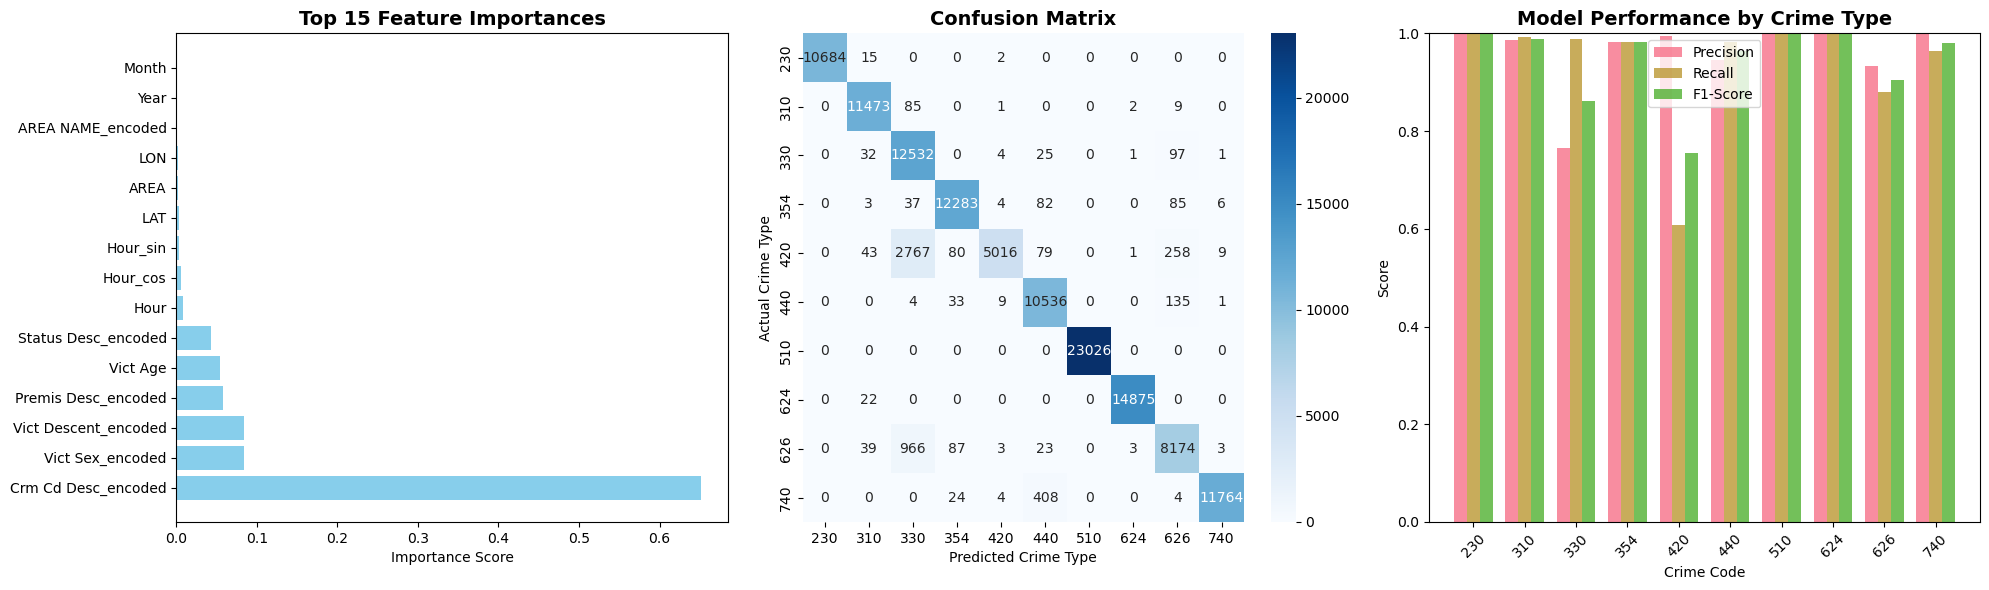


Classification Model Summary:
• Overall Accuracy: 95.6%
• Macro Average F1-Score: 0.944
• Weighted Average F1-Score: 0.955


In [27]:
# Crime Type Classification Model
print("\n2. Crime Type Classification Model")
print("-" * 40)

# Prepare data for classification
X = ml_clean_df[feature_columns]
y = ml_clean_df['Crm Cd']

# Use only top 10 crime types for classification (to reduce complexity)
top_crimes_for_ml = y.value_counts().head(10).index
X_filtered = X[y.isin(top_crimes_for_ml)]
y_filtered = y[y.isin(top_crimes_for_ml)]

print(f"• Classification target: Top 10 crime types")
print(f"• Training samples: {len(X_filtered):,}")
print(f"• Number of classes: {len(top_crimes_for_ml)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
print("\n• Training Random Forest Classifier...")
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=50,
    n_jobs=-1
)

rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"• Model Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Most Important Features:")
for i, (idx, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['feature']}: {row['importance']:.4f}")

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Feature importance plot
top_features = feature_importance.head(15)
axes[0].barh(top_features['feature'], top_features['importance'], color='skyblue')
axes[0].set_title('Top 15 Feature Importances', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Importance Score')

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted Crime Type')
axes[1].set_ylabel('Actual Crime Type')

# Classification performance by crime type
classification_rep = classification_report(y_test, y_pred, output_dict=True)
crime_performance = []
for crime_code in sorted(y_test.unique()):
    if str(crime_code) in classification_rep:
        performance = classification_rep[str(crime_code)]
        crime_performance.append({
            'Crime_Code': crime_code,
            'Precision': performance['precision'],
            'Recall': performance['recall'],
            'F1_Score': performance['f1-score']
        })

perf_df = pd.DataFrame(crime_performance)
crime_codes = perf_df['Crime_Code'].astype(str)

x_pos = np.arange(len(crime_codes))
width = 0.25

axes[2].bar(x_pos - width, perf_df['Precision'], width, label='Precision', alpha=0.8)
axes[2].bar(x_pos, perf_df['Recall'], width, label='Recall', alpha=0.8)
axes[2].bar(x_pos + width, perf_df['F1_Score'], width, label='F1-Score', alpha=0.8)

axes[2].set_title('Model Performance by Crime Type', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Crime Code')
axes[2].set_ylabel('Score')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(crime_codes, rotation=45)
axes[2].legend()
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

print(f"\nClassification Model Summary:")
print(f"• Overall Accuracy: {accuracy:.1%}")
print(f"• Macro Average F1-Score: {classification_rep['macro avg']['f1-score']:.3f}")
print(f"• Weighted Average F1-Score: {classification_rep['weighted avg']['f1-score']:.3f}")



3. Geographic Crime Clustering Analysis
----------------------------------------
• Clustering sample size: 10,000 records


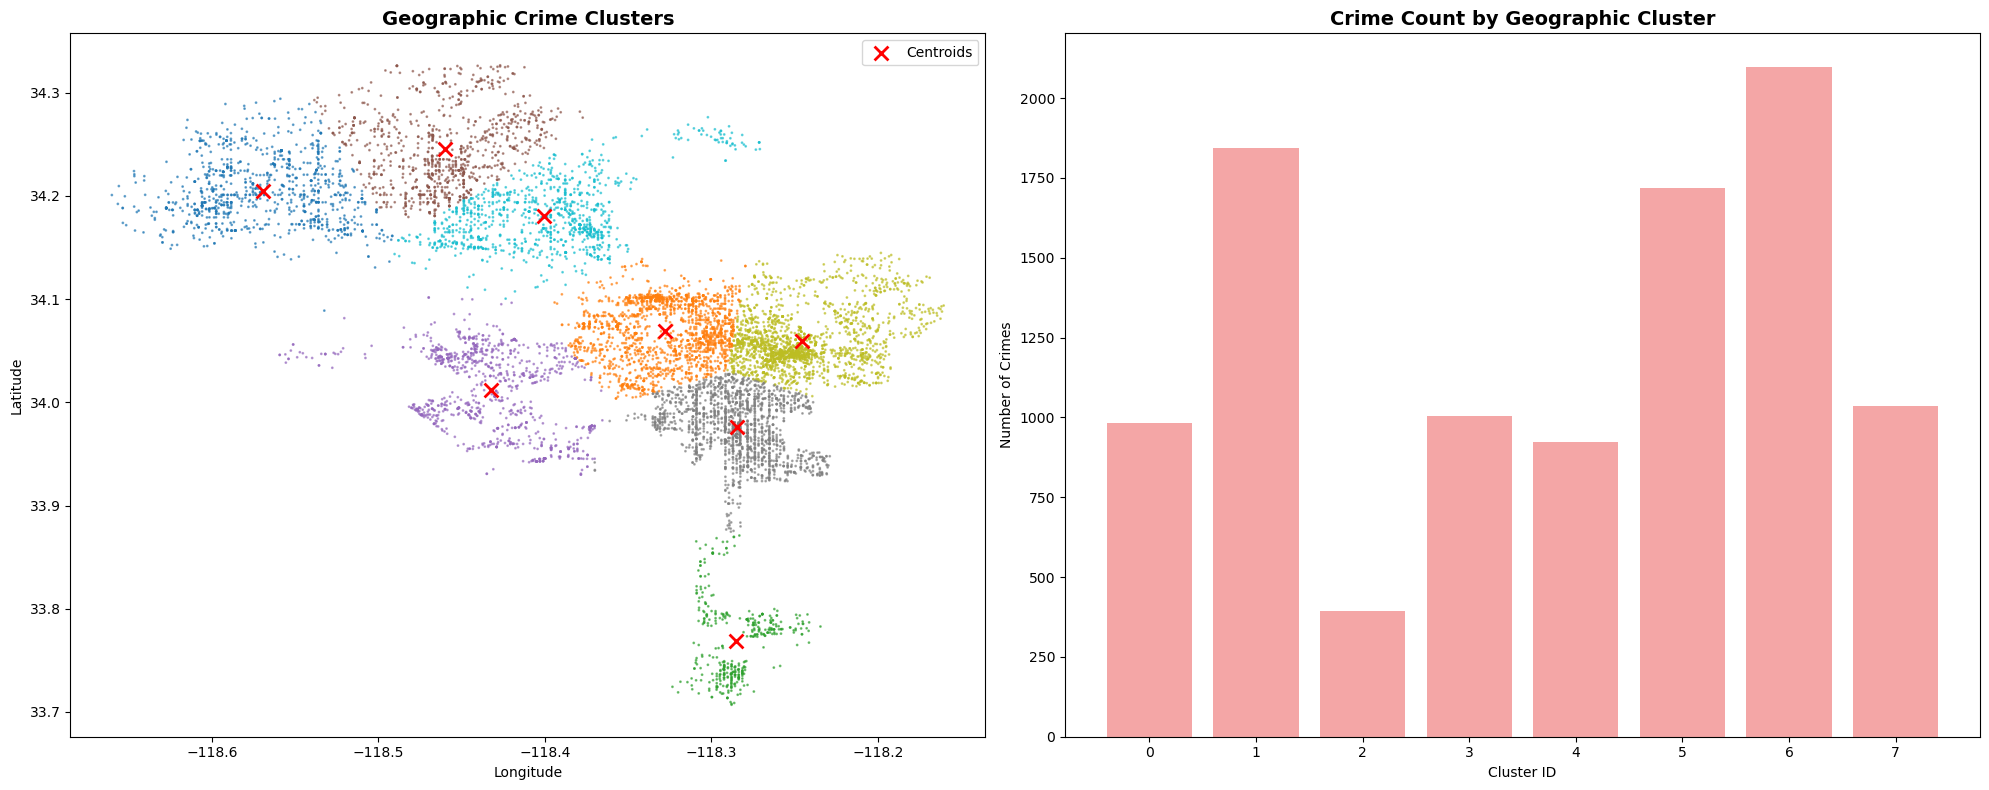


Cluster Analysis Results:
Cluster 0: 983.0 crimes, Diversity: 64.0 types, Location: (34.205, -118.569)
Cluster 1: 1845.0 crimes, Diversity: 75.0 types, Location: (34.069, -118.328)
Cluster 2: 393.0 crimes, Diversity: 48.0 types, Location: (33.769, -118.285)
Cluster 3: 1003.0 crimes, Diversity: 56.0 types, Location: (34.012, -118.432)
Cluster 4: 922.0 crimes, Diversity: 62.0 types, Location: (34.246, -118.460)
Cluster 5: 1720.0 crimes, Diversity: 74.0 types, Location: (33.976, -118.284)
Cluster 6: 2098.0 crimes, Diversity: 77.0 types, Location: (34.059, -118.245)
Cluster 7: 1036.0 crimes, Diversity: 55.0 types, Location: (34.181, -118.401)

4. Time Series Crime Forecasting
----------------------------------------
• Time series length: 1879 days
• Date range: 2020-01-01 to 2025-05-29
• Average daily crimes: 533.6


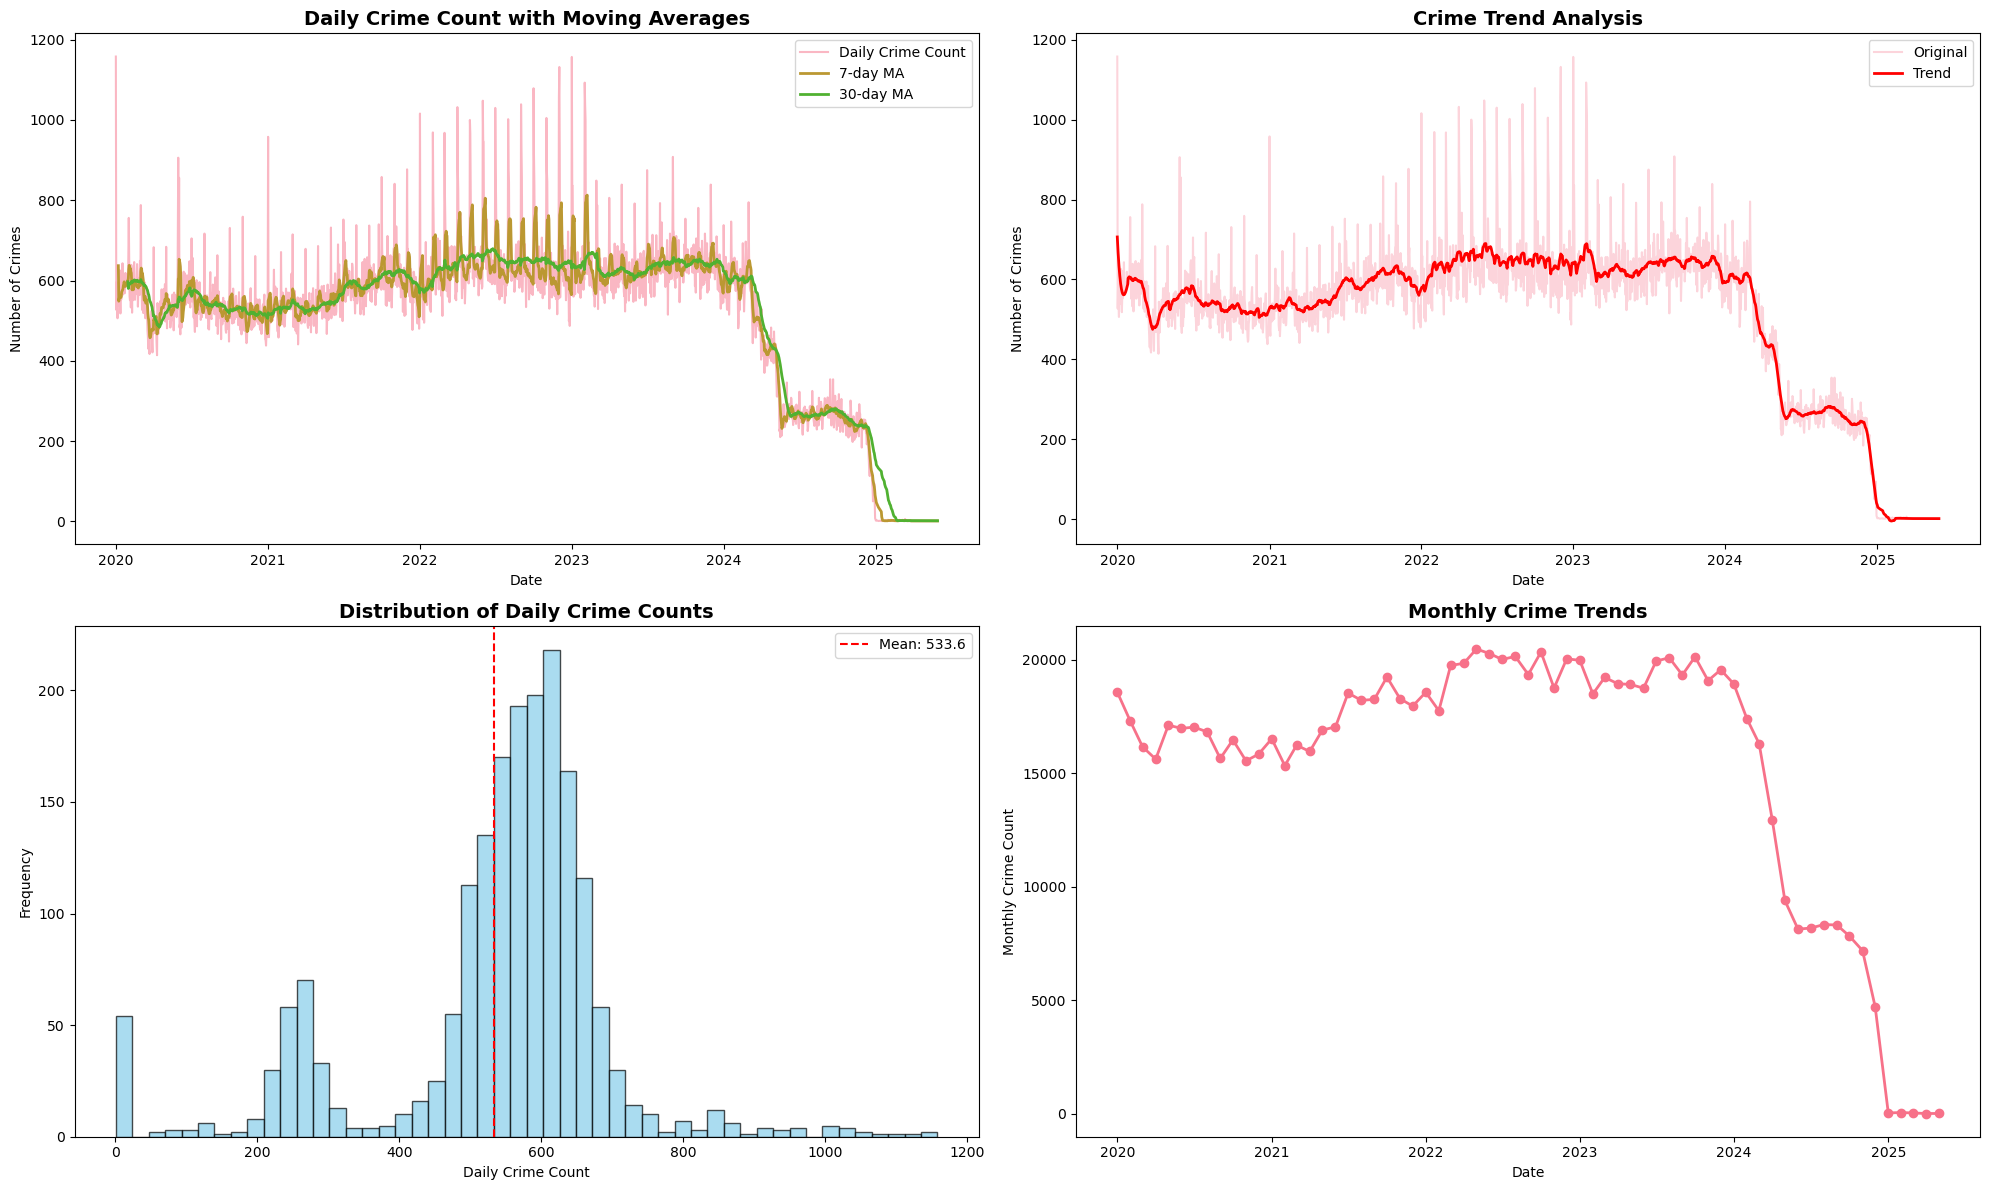


Time Series Statistics:
• Mean daily crimes: 533.6
• Standard deviation: 169.5
• Minimum daily crimes: 1
• Maximum daily crimes: 1158
• Coefficient of variation: 0.318
• Peak crime month: Jan (92,557 crimes)
• Lowest crime month: Dec (78,069 crimes)
• Seasonal variation: 17.3%


In [28]:
# Geographic Clustering Analysis & Time Series Forecasting
print("\n3. Geographic Crime Clustering Analysis")
print("-" * 40)

# Prepare geographic data for clustering
geo_data = ml_clean_df[['LAT', 'LON', 'Crm Cd']].copy()

# Sample data for clustering (to improve performance)
sample_size = min(10000, len(geo_data))
geo_sample = geo_data.sample(n=sample_size, random_state=42)

print(f"• Clustering sample size: {sample_size:,} records")

# Perform K-means clustering on geographic coordinates
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
geo_sample['Cluster'] = kmeans.fit_predict(geo_sample[['LAT', 'LON']])

# Analyze cluster characteristics
cluster_analysis = []
for cluster_id in range(n_clusters):
    cluster_data = geo_sample[geo_sample['Cluster'] == cluster_id]
    
    # Calculate cluster statistics
    cluster_stats = {
        'Cluster_ID': cluster_id,
        'Crime_Count': len(cluster_data),
        'Avg_LAT': cluster_data['LAT'].mean(),
        'Avg_LON': cluster_data['LON'].mean(),
        'Most_Common_Crime': cluster_data['Crm Cd'].mode().iloc[0] if len(cluster_data) > 0 else None,
        'Crime_Diversity': len(cluster_data['Crm Cd'].unique())
    }
    cluster_analysis.append(cluster_stats)

cluster_df = pd.DataFrame(cluster_analysis)

# Visualize clustering results
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Geographic clustering visualization
scatter = axes[0].scatter(geo_sample['LON'], geo_sample['LAT'], 
                         c=geo_sample['Cluster'], cmap='tab10', alpha=0.6, s=1)
axes[0].scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], 
               c='red', marker='x', s=100, linewidths=2, label='Centroids')
axes[0].set_title('Geographic Crime Clusters', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].legend()

# Cluster characteristics
cluster_sizes = geo_sample['Cluster'].value_counts().sort_index()
axes[1].bar(cluster_sizes.index, cluster_sizes.values, color='lightcoral', alpha=0.7)
axes[1].set_title('Crime Count by Geographic Cluster', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cluster ID')
axes[1].set_ylabel('Number of Crimes')

plt.tight_layout()
plt.show()

print("\nCluster Analysis Results:")
for idx, row in cluster_df.iterrows():
    print(f"Cluster {int(row['Cluster_ID'])}: {row['Crime_Count']} crimes, "
          f"Diversity: {row['Crime_Diversity']} types, "
          f"Location: ({row['Avg_LAT']:.3f}, {row['Avg_LON']:.3f})")

# Time Series Forecasting
print("\n4. Time Series Crime Forecasting")
print("-" * 40)

# Aggregate daily crime counts
daily_crimes = df.groupby('DATE OCC').size().reset_index()
daily_crimes.columns = ['Date', 'Crime_Count']
daily_crimes['Date'] = pd.to_datetime(daily_crimes['Date'])
daily_crimes = daily_crimes.sort_values('Date')

print(f"• Time series length: {len(daily_crimes)} days")
print(f"• Date range: {daily_crimes['Date'].min().strftime('%Y-%m-%d')} to {daily_crimes['Date'].max().strftime('%Y-%m-%d')}")
print(f"• Average daily crimes: {daily_crimes['Crime_Count'].mean():.1f}")

# Create rolling averages for trend analysis
daily_crimes['MA_7'] = daily_crimes['Crime_Count'].rolling(window=7).mean()
daily_crimes['MA_30'] = daily_crimes['Crime_Count'].rolling(window=30).mean()

# Decompose time series
from scipy import signal

# Simple trend and seasonality decomposition
# Calculate trend using Savitzky-Golay filter
if len(daily_crimes) > 51:  # Minimum required for savgol_filter
    window_length = min(51, len(daily_crimes) - 1)
    if window_length % 2 == 0:  # Must be odd
        window_length -= 1
    trend = signal.savgol_filter(daily_crimes['Crime_Count'], window_length, 3)
    daily_crimes['Trend'] = trend
    daily_crimes['Detrended'] = daily_crimes['Crime_Count'] - daily_crimes['Trend']

# Visualize time series analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Original time series with moving averages
axes[0, 0].plot(daily_crimes['Date'], daily_crimes['Crime_Count'], alpha=0.5, label='Daily Crime Count')
axes[0, 0].plot(daily_crimes['Date'], daily_crimes['MA_7'], label='7-day MA', linewidth=2)
axes[0, 0].plot(daily_crimes['Date'], daily_crimes['MA_30'], label='30-day MA', linewidth=2)
axes[0, 0].set_title('Daily Crime Count with Moving Averages', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Crimes')
axes[0, 0].legend()

# Trend analysis
if 'Trend' in daily_crimes.columns:
    axes[0, 1].plot(daily_crimes['Date'], daily_crimes['Crime_Count'], alpha=0.3, label='Original')
    axes[0, 1].plot(daily_crimes['Date'], daily_crimes['Trend'], label='Trend', linewidth=2, color='red')
    axes[0, 1].set_title('Crime Trend Analysis', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Number of Crimes')
    axes[0, 1].legend()

# Distribution of daily crime counts
axes[1, 0].hist(daily_crimes['Crime_Count'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].axvline(daily_crimes['Crime_Count'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {daily_crimes["Crime_Count"].mean():.1f}')
axes[1, 0].set_title('Distribution of Daily Crime Counts', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Daily Crime Count')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Monthly aggregation for seasonal analysis
monthly_crimes = df.groupby([df['Year'], df['Month']]).size().reset_index()
monthly_crimes.columns = ['Year', 'Month', 'Crime_Count']
monthly_crimes['Date'] = pd.to_datetime(monthly_crimes[['Year', 'Month']].assign(day=1))

axes[1, 1].plot(monthly_crimes['Date'], monthly_crimes['Crime_Count'], marker='o', linewidth=2)
axes[1, 1].set_title('Monthly Crime Trends', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Monthly Crime Count')

plt.tight_layout()
plt.show()

# Statistical summary of time series
print(f"\nTime Series Statistics:")
print(f"• Mean daily crimes: {daily_crimes['Crime_Count'].mean():.1f}")
print(f"• Standard deviation: {daily_crimes['Crime_Count'].std():.1f}")
print(f"• Minimum daily crimes: {daily_crimes['Crime_Count'].min()}")
print(f"• Maximum daily crimes: {daily_crimes['Crime_Count'].max()}")
print(f"• Coefficient of variation: {(daily_crimes['Crime_Count'].std() / daily_crimes['Crime_Count'].mean()):.3f}")

# Seasonal patterns
seasonal_stats = df.groupby('Month')['DR_NO'].count()
peak_month = seasonal_stats.idxmax()
low_month = seasonal_stats.idxmin()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print(f"• Peak crime month: {month_names[peak_month-1]} ({seasonal_stats.max():,} crimes)")
print(f"• Lowest crime month: {month_names[low_month-1]} ({seasonal_stats.min():,} crimes)")
print(f"• Seasonal variation: {((seasonal_stats.max() - seasonal_stats.min()) / seasonal_stats.mean()) * 100:.1f}%")
